# PDI Benchmark

In [282]:
import sys 
sys.path.append('../')
import pandas as pd
import numpy as np
import decouple
import db_funcs
import datetime
import time
import matplotlib as plt

In [283]:
from pycoingecko import CoinGeckoAPI
key =  decouple.config("CG_KEY")
cg = CoinGeckoAPI(api_key=key)

In [284]:
# PDI start date
pdi_start_date = datetime.date(2022,5,24)
pdi_start_date_unix = time.mktime(pdi_start_date.timetuple())

In [285]:
weights = pd.read_sql('Select * from pdi_benchmark_data',db_funcs.create_connection(db_funcs.db),index_col='date',parse_dates=['date'])
weights.columns = db_funcs.convert_from_sql_strings(weights.columns)
weights.sort_index(inplace=True)
weights


,uniswap,lido-dao,aave,rocket-pool,frax-share,havven,curve-dao-token,maker,convex-finance,1inch,sushi,balancer,yearn-finance,ribbon-finance,amp-token,compound-governance-token,loopring,alchemix
date,,,,,,,,,,,,,,,,,,
2022-06-01,0.3,0.120675,0.300000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.068245,NaN,0.081956,NaN,NaN,0.118707,NaN,0.010418
2022-07-01,0.3,NaN,0.300000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.200012,NaN,0.169468,NaN,NaN,NaN,NaN,0.030520
2022-08-01,0.3,0.110336,0.170569,NaN,NaN,NaN,NaN,0.122066,NaN,0.053978,0.037096,0.026436,0.032707,NaN,0.096048,0.050765,NaN,NaN
2022-09-01,0.3,0.157347,0.162565,NaN,NaN,0.093608,NaN,0.088221,NaN,0.048907,0.032103,0.033948,0.039018,NaN,NaN,0.044282,NaN,NaN
2022-10-01,0.3,0.144693,0.147936,0.063191,NaN,0.079145,NaN,0.090124,NaN,0.049998,0.028544,NaN,0.036244,NaN,NaN,0.060124,NaN,NaN
2022-11-01,0.3,0.124904,0.123283,0.048561,NaN,0.060370,0.054929,0.084037,0.041181,0.039532,0.034005,0.025822,0.026746,NaN,NaN,0.036631,NaN,NaN
2022-12-01,0.3,0.124474,0.129102,0.054923,NaN,NaN,0.061617,0.082682,0.040111,0.046944,0.036815,0.032885,0.032366,0.021488,NaN,0.036595,NaN,NaN
2023-01-01,0.3,0.162204,0.122978,0.065435,NaN,NaN,0.056349,0.074071,0.037664,0.049717,0.030288,0.033397,0.028426,NaN,NaN,NaN,0.039472,NaN
2023-02-01,0.3,0.157963,0.103976,0.056276,0.062614,0.053221,0.066322,0.054667,0.033190,0.035075,0.021971,0.022702,0.020074,0.011950,NaN,NaN,NaN,NaN


In [286]:
prices = pd.DataFrame()
for asset in weights.columns:
    temp_df = pd.DataFrame(cg.get_coin_market_chart_range_by_id(asset,'usd',pdi_start_date_unix,time.mktime(datetime.date.today().timetuple()))['prices'],columns=['date',asset])
    temp_df = temp_df.astype({'date':'datetime64[ms]',asset:'float'}).set_index('date')
    prices = pd.concat([prices,temp_df],axis='columns')
prices

,uniswap,lido-dao,aave,rocket-pool,frax-share,havven,curve-dao-token,maker,convex-finance,1inch,sushi,balancer,yearn-finance,ribbon-finance,amp-token,compound-governance-token,loopring,alchemix
date,,,,,,,,,,,,,,,,,,
2022-05-24,5.624137,1.175319,99.546366,19.650852,7.066686,2.609591,1.299174,1304.610057,10.127076,0.953046,1.541175,7.461083,8943.204430,0.449379,0.012946,69.058851,0.553557,31.945129
2022-05-25,5.597278,1.101074,106.736414,19.854530,6.936132,2.609558,1.254714,1292.087725,10.459210,0.994063,1.668843,7.569291,9082.545372,0.388141,0.013282,70.210403,0.552741,34.375729
2022-05-26,5.617416,1.089465,102.079899,19.324560,7.328046,2.549598,1.231693,1261.184577,10.554921,0.969230,1.654377,7.509517,8499.306695,0.351769,0.012831,65.883186,0.612392,32.718837
2022-05-27,4.975035,1.007757,101.570425,17.524211,6.755771,2.388564,1.211745,1161.324885,9.722535,0.917874,1.482991,6.811070,7791.688210,0.313146,0.012393,59.711880,0.511394,28.964321
2022-05-28,4.674747,1.072970,92.390089,15.357304,6.645840,2.451560,1.170061,1115.568680,9.224288,0.896363,1.417673,6.427363,7381.991834,0.281725,0.011484,55.688905,0.478346,31.937670
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-12,6.490484,2.383191,79.460196,46.345844,10.627276,2.445124,0.959129,723.578693,5.879165,0.542666,1.316950,6.425165,7203.897866,0.239290,0.004653,50.240801,0.437144,20.050029
2023-02-13,6.336014,2.503678,77.341876,46.608299,10.178708,2.345621,0.925773,683.820318,5.637485,0.531867,1.265963,6.267602,6982.694737,0.238638,0.004653,48.477151,0.408762,19.792239
2023-02-14,6.248098,2.378438,82.497565,41.510019,9.931668,2.398219,1.057155,770.377116,6.137227,0.530384,1.282946,6.279481,6789.662121,0.233995,0.004539,48.714735,0.394396,21.572368


In [287]:
prices_pct_change = prices.pct_change().dropna(axis=0,how='all')
prices_pct_change

,uniswap,lido-dao,aave,rocket-pool,frax-share,havven,curve-dao-token,maker,convex-finance,1inch,sushi,balancer,yearn-finance,ribbon-finance,amp-token,compound-governance-token,loopring,alchemix
date,,,,,,,,,,,,,,,,,,
2022-05-25,-0.004776,-0.063170,0.072228,0.010365,-0.018475,-0.000013,-0.034222,-0.009599,0.032797,0.043038,0.082838,0.014503,0.015581,-0.136273,0.025937,0.016675,-0.001474,0.076087
2022-05-26,0.003598,-0.010544,-0.043626,-0.026693,0.056503,-0.022977,-0.018348,-0.023917,0.009151,-0.024982,-0.008668,-0.007897,-0.064215,-0.093706,-0.033911,-0.061632,0.107918,-0.048199
2022-05-27,-0.114355,-0.074998,-0.004991,-0.093164,-0.078094,-0.063160,-0.016196,-0.079179,-0.078862,-0.052986,-0.103595,-0.093008,-0.083256,-0.109798,-0.034135,-0.093670,-0.164923,-0.114751
2022-05-28,-0.060359,0.064711,-0.090384,-0.123652,-0.016272,0.026374,-0.034400,-0.039400,-0.051247,-0.023436,-0.044045,-0.056336,-0.052581,-0.100339,-0.073412,-0.067373,-0.064624,0.102656
2022-05-29,0.068447,-0.037853,0.033198,0.073807,0.028894,0.017631,0.045808,0.092112,0.017418,0.024642,0.079153,0.051627,0.035976,0.083842,0.019402,0.023993,0.013009,-0.010780
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-12,0.020185,0.036560,0.008863,0.015874,0.020691,0.019865,-0.000871,0.015267,0.014468,0.021231,0.015158,0.012309,0.025330,0.026959,0.024636,0.008767,0.125379,0.020561
2023-02-13,-0.023799,0.050557,-0.026659,0.005663,-0.042209,-0.040695,-0.034778,-0.054947,-0.041108,-0.019900,-0.038716,-0.024523,-0.030706,-0.002725,-0.000134,-0.035104,-0.064926,-0.012857
2023-02-14,-0.013875,-0.050022,0.066661,-0.109386,-0.024270,0.022424,0.141917,0.126578,0.088646,-0.002789,0.013415,0.001895,-0.027644,-0.019458,-0.024539,0.004901,-0.035144,0.089941


In [288]:
pdi_start_price = 100
pdi_performance = pd.DataFrame(columns=['index_price'])
pdi_performance.loc[pd.to_datetime(pdi_start_date)] = pdi_start_price


for date, asset_changes in prices_pct_change.iterrows():
    daily_change = 0
    if date < weights.first_valid_index():
        index_weights = weights.loc[weights.first_valid_index()].dropna()
    else:
        index_weights = weights.loc[weights.loc[:date].last_valid_index()].dropna()
    for asset, weight in index_weights.iteritems():
        daily_change += weight * asset_changes[asset]
    pdi_start_price *= 1+daily_change
    pdi_performance.loc[date] = pdi_start_price

pdi_performance.index.name = 'date'
pdi_pct_change = pdi_performance.pct_change().rename(columns={'index_price':'index_daily_pct_change'})
pdi_performance = pdi_performance.join(pdi_pct_change,on='date',how='left')

cumulative_pct_change = []
for date, index_data in  pdi_performance.iterrows():
    cumulative_pct_change.append(index_data['index_price']/100 -1)

pdi_performance['cumulative_pct_change'] = cumulative_pct_change

pdi_performance.fillna(0,inplace=True)
pdi_performance
    



    

,index_price,index_daily_pct_change,cumulative_pct_change
date,,,
2022-05-24,100.000000,0.000000,0.000000
2022-05-25,102.231503,0.022315,0.022315
2022-05-26,99.475993,-0.026954,-0.005240
2022-05-27,92.407007,-0.071062,-0.075930
2022-05-28,87.633518,-0.051657,-0.123665
...,...,...,...
2023-02-12,101.334546,0.019443,0.013345
2023-02-13,99.728945,-0.015845,-0.002711
2023-02-14,100.438149,0.007111,0.004381


<AxesSubplot: title={'center': 'PDI Benchmark Performance'}, xlabel='Date', ylabel='Price (USD)'>

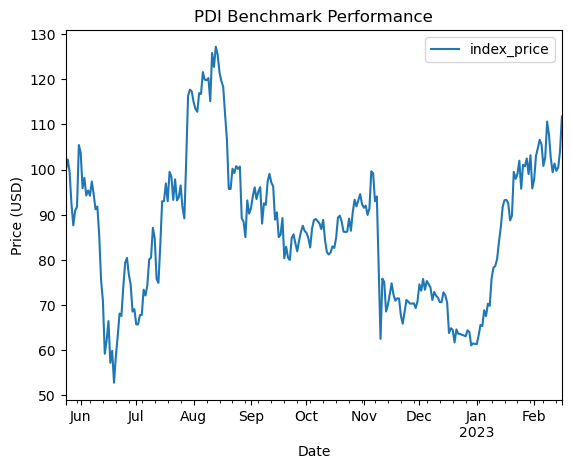

In [294]:
pdi_performance.plot(y=['index_price'],title='PDI Benchmark Performance',xlabel='Date',ylabel='Price (USD)')